## QBUS3850 Lab 5 (VAR) Task

In [42]:
import matplotlib.pyplot as plt
import statsmodels as sm 
import statsmodels.api as smt
import numpy as np
import pandas as pd

from statsmodels.tsa.api import VAR

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

### 1. Load 5 years of stock prices for BHP (BHP.AX.csv) and Rio Tinto (RIO.AX.csv).

Data are from Yahoo. Adj Close means historical close price, adjusted for dividends and corporate actions.

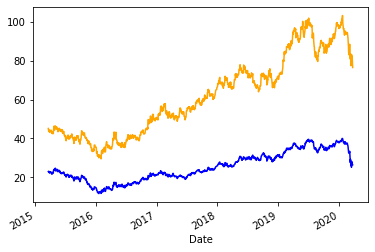

In [24]:
data1 = pd.read_csv('BHP.AX.csv', index_col='Date', parse_dates=True)
data2 = pd.read_csv('RIO.AX.csv', index_col='Date', parse_dates=True)

cl = pd.DataFrame()
cl['BHP'] = data1["Adj Close"]
cl['RIO'] = data2["Adj Close"]

cl['BHP'].plot( color='blue' )
cl['RIO'].plot( color='orange' )

### 2. Construct the daily return series for each stock.

Recall that returns are defined as

$$\textrm{Return}_t=\frac{\textrm{Closing Price}_t-\textrm{Closing Price}_{t-1}}{\textrm{Closing Price}_t}$$

                 BHP       RIO
Date                          
2015-03-24  0.007098 -0.014431
2015-03-25 -0.003524 -0.009413
2015-03-26 -0.010609 -0.005807
2015-03-27 -0.000973  0.000885
2015-03-30 -0.021139 -0.012378
2015-03-31  0.030896  0.024709
2015-04-01 -0.022235 -0.014328
2015-04-02 -0.003957 -0.011168
2015-04-07  0.007610  0.006633
2015-04-08  0.009524  0.015138


(737425.0, 737515.0)

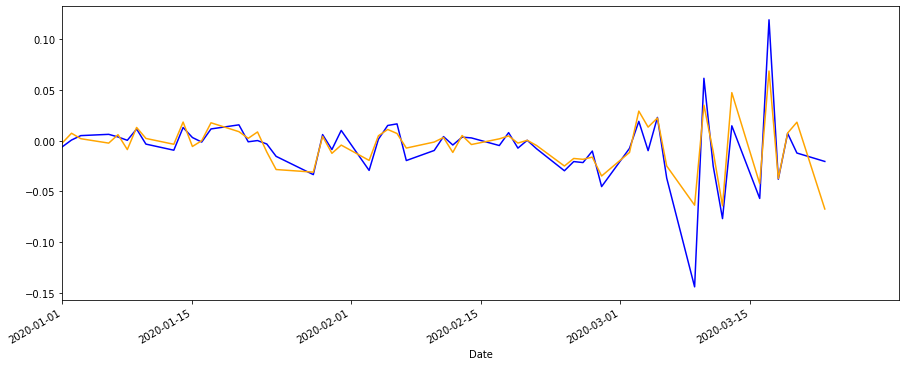

In [101]:
## Daily return series
y = ( cl - cl.shift() ) / cl.shift()
y.dropna( inplace=True )
print( y.head(10) )

y['BHP'].plot( color='blue' )
y['RIO'].plot( color='orange' )
plt.xlim( '2020-01-01', '2020-03-31' )

### 3. Plot the autocorrelation and lagged cross-correlation of the stocks' return series.
 - Do both variables affect eachother?
 - Are both variables stationary?

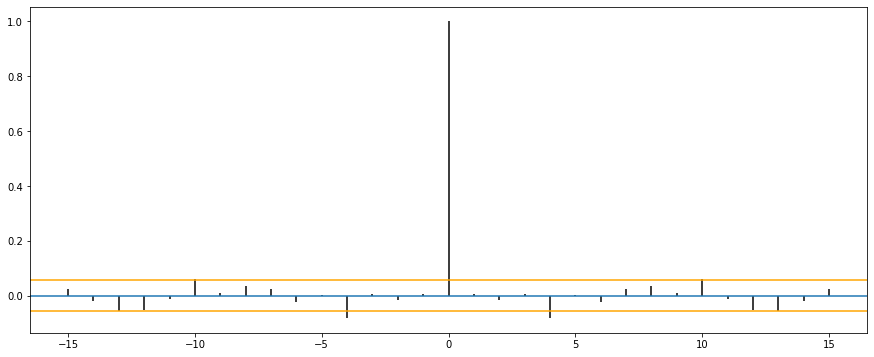

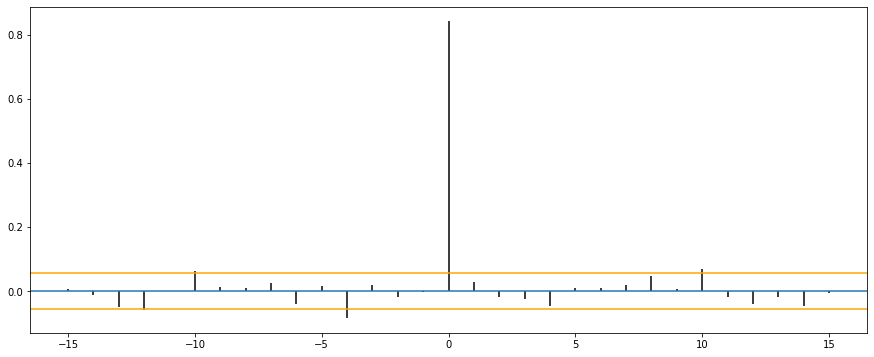

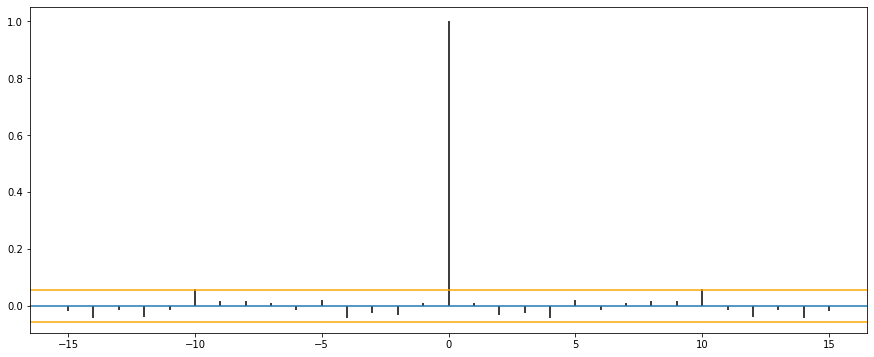

In [50]:
def demean(x):
    return x - np.mean( x )

plt.figure()
plt.xcorr( y['BHP'], y['BHP'], detrend=demean, maxlags=15 )
plt.axhline( 2.0/np.sqrt( len(y) ), color='orange' )
plt.axhline( -2.0/np.sqrt( len(y) ), color='orange' )

plt.figure()
plt.xcorr( y['BHP'], y['RIO'], detrend=demean, maxlags=15 )
plt.axhline( 2.0/np.sqrt( len(y) ), color='orange' )
plt.axhline( -2.0/np.sqrt( len(y) ), color='orange' )

plt.figure()
plt.xcorr( y['RIO'], y['RIO'], detrend=demean, maxlags=15 )
plt.axhline( 2.0/np.sqrt( len(y) ), color='orange' )
plt.axhline( -2.0/np.sqrt( len(y) ), color='orange' )

print()

### 4. Fit an appropriate VAR model. 
 - Is it significant?

In [63]:
p = 4
fit = VAR( y ).fit( p )
print( fit.summary() )

## Plot residual autocorrelations
#fit.plot_acorr()
#print()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 23, Mar, 2020
Time:                     13:33:16
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -17.2171
Nobs:                     1263.00    HQIC:                  -17.2628
Log likelihood:           7352.60    FPE:                3.09676e-08
AIC:                     -17.2903    Det(Omega_mle):     3.05309e-08
--------------------------------------------------------------------
Results for equation BHP
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.000312         0.000533            0.585           0.558
L1.BHP        -0.056654         0.052367           -1.082           0.279
L1.RIO         0.088530         0.058137            1.523           0.128
L2.BHP         0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### 5. Produce forecasts.

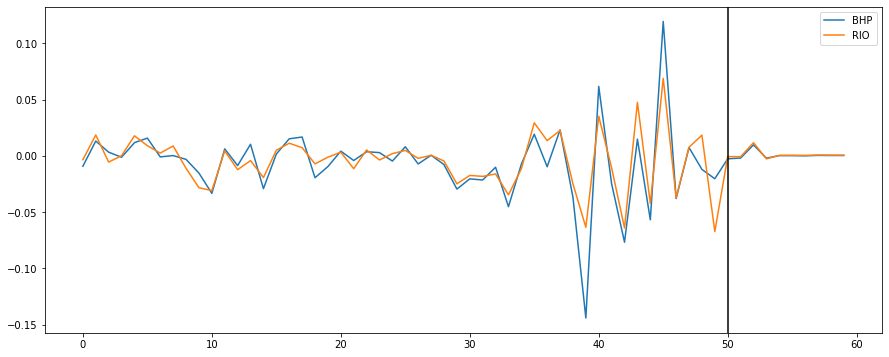

In [108]:
f = fit.forecast( y.values, 10 )

plt.plot( np.r_[ y.values[-50:,], f ] )
plt.legend( labels=['BHP', 'RIO'])
plt.axvline( 50, color='black' )

## plot_forecast can't set the axis to a sensible value.
#fit.plot_forecast( steps=10 )
#plt.xlim( 1200, 1275 )
#print()